In [11]:
import nkutil
import e2h
import netket as nk
import lattice
import numpy as np

lat = lattice.SquareLattice([4, 4], [True, True])
graph = nkutil.convert_lattice(lat, False, 2)
hi = nk.hilbert.Spin(s=0.5, total_sz=0.0, graph=graph)

In [24]:
ham = nkutil.j1j2_ham(hi, 0, "none")
wf = np.zeros((hi.n_states,), dtype=complex)
wf[hi.state_to_number([1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1])] = 1
wf /= np.linalg.norm(wf)
np.vdot(wf, ham.to_sparse() * wf)

(-31.999999999999993+0j)

In [25]:
np.vdot(wf, ham.to_sparse() * ham.to_sparse() * wf)

(1151.9999999999998+0j)

In [26]:
ham = nkutil.j1j2_ham(hi, 999999, "none")
wf = np.zeros((hi.n_states,), dtype=complex)
wf[hi.state_to_number([1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1])] = 1
wf[hi.state_to_number([1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, -1])] = 1
wf /= np.linalg.norm(wf)
np.vdot(wf, ham.to_sparse() * wf)

(-31.999999999999993+0j)

In [27]:
np.vdot(wf, ham.to_sparse() * ham.to_sparse() * wf)

(1152.0000000000641+0j)

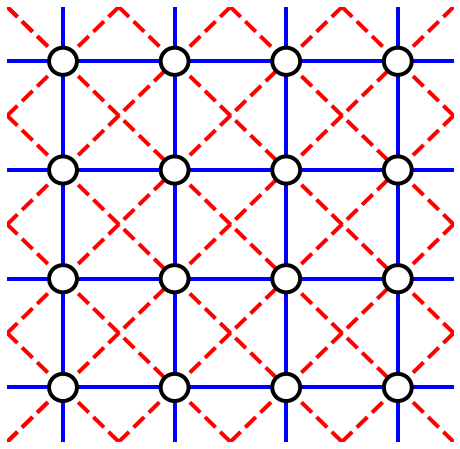

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 8])
ax = plt.gca()
plt.xlim([0, 16])
plt.ylim([0, 16])

for i in range(4):
    for j in range(4):
        for d in [(0, 1), (1, 0), (-1, 0), (0, -1)]:
            i_ = i + d[0]
            j_ = j + d[1]
            circ = plt.Line2D((2 + 4 * i, 2 + 4 * i_), (2 + 4 * j, 2 + 4 * j_), color="b", lw=4, zorder=2)
            ax.add_line(circ)
        dirs = [(1, 1), (1, -1)]
        if i == 0:
            dirs += [(-1, 1), (-1, -1)]
        if j == 0:
            dirs += [(-1, -1)]
        if j == 3:
            dirs += [(-1, 1)]
        for d in dirs:
            i_ = i + d[0]
            j_ = j + d[1]
            circ = plt.Line2D((2 + 4 * i, 2 + 4 * i_), (2 + 4 * j, 2 + 4 * j_), color="r", lw=4, zorder=2, ls="--")
            ax.add_line(circ)

for i in range(4):
    for j in range(4):
        circ = plt.Circle((2 + 4 * i, 2 + 4 * j), radius=0.5, lw=4, ec="k", fc="w", zorder=4)
        ax.add_patch(circ)
        
plt.axis('off')
plt.savefig("/mnt/c/Users/Kevin/Pictures/1a.png", dpi=300)

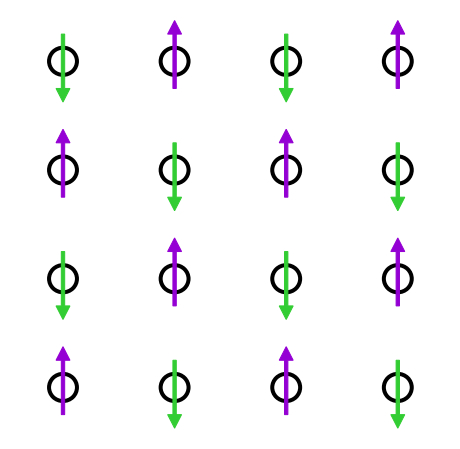

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=[8, 8])
ax = plt.gca()
plt.xlim([0, 16])
plt.ylim([0, 16])

for i in range(4):
    for j in range(4):
        circ = plt.Circle((2 + 4 * i, 2 + 4 * j), radius=0.5, lw=4, ec="k", fc="w", zorder=4)
        ax.add_patch(circ)
        
        if (i + j) % 2 == 0:
            plt.arrow(2 + 4 * i, 2 + 4 * j - 1, 0, 2, zorder=6, width=0.12, head_width=0.5, head_length=0.5, color="darkviolet")
        else:
            plt.arrow(2 + 4 * i, 2 + 4 * j + 1, 0, -2, zorder=6, width=0.12, head_width=0.5, head_length=0.5, color="limegreen")
        
plt.axis('off')
plt.savefig("/mnt/z/Users/Kevin/Pictures/1b", dpi=300)